In [2]:
import matplotlib.font_manager as fm

# 使用可能なフォント一覧を表示
available_fonts = sorted(set(f.name for f in fm.fontManager.ttflist))
for font in available_fonts:
    print(font)

Abyssinica SIL
Ani
AnjaliOldLipi
C059
Chandas
Chilanka
D050000L
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Droid Sans Fallback
Dyuthi
FreeMono
FreeSans
FreeSerif
Gargi
Garuda
Gayathri
Gubbi
Jamrul
KacstArt
KacstBook
KacstDecorative
KacstDigital
KacstFarsi
KacstLetter
KacstNaskh
KacstOffice
KacstOne
KacstPen
KacstPoster
KacstQurn
KacstScreen
KacstTitle
KacstTitleL
Kalapi
Kalimati
Karumbi
Keraleeyam
Khmer OS
Khmer OS System
Kinnari
LKLUG
Laksaman
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Likhan
Lohit Assamese
Lohit Bengali
Lohit Devanagari
Lohit Gujarati
Lohit Gurmukhi
Lohit Kannada
Lohit Malayalam
Lohit Odia
Lohit Tamil
Lohit Tamil Classical
Lohit Telugu
Loma
M+ 1c
M+ 1m
M+ 1mn
M+ 1p
M+ 2c
M+ 2m
M+ 2p
Manjari
Meera
Mitra Mono
Mukti Narrow
Nakula
Navilu
Nimbus Mono PS
Nimbus Roman
Nimbus Sans
Nimbus Sans Narrow
Norasi
Noto Mono
Noto Sans CJK JP
Noto Serif CJK JP
OpenSymbol
P052
Padauk
Padauk Book
P

In [3]:
import os

def get_unique_filename(base_filename):
    # 拡張子とベース名を分離
    name, ext = os.path.splitext(base_filename)
    counter = 1
    
    # ファイル名候補を生成
    output_file = base_filename
    # ファイルが存在する限り、カウンターを増やして新しいファイル名を試す
    while os.path.exists(output_file):
        output_file = f"{name}_{counter}{ext}"
        counter += 1
    
    return output_file

In [4]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# 日本語フォントの設定（フォント名はシステムにインストールされているものを指定）
mpl.rcParams['font.family'] = 'M+ 1c'

# CSVファイルを読み込む
file_path = r'/home/ubuntu/cur/program/seminar/2019年度_地熱発電所運転状況(出力1000kW未満)_v2.0.csv'
data_2019 = pd.read_csv(file_path)
data_2019.head()

,発電所名,設備容量(kW),発電電力量(MWh),暦日利用率(%)
0,摩周湖温泉熱,125.0,174.0,15.8
1,諏訪湖温泉KH-1,72.0,96.0,24.3
2,奥尻,250.0,1614.0,73.5
3,鳴子温泉バイナリ,65.0,NaN,NaN
4,土湯温泉16号源泉バイナリ,440.0,3190.0,90.8


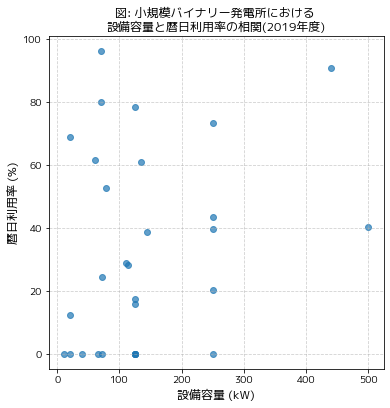

In [5]:
# NaN値を含む行を削除
filtered_data = data_2019.dropna(subset=['設備容量(kW)', '暦日利用率(%)'])

# 散布図の作成
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(filtered_data['設備容量(kW)'], filtered_data['暦日利用率(%)'], alpha=0.7)

# タイトルの設定("\n"で改行)
plt.title('図: 小規模バイナリー発電所における \n設備容量と暦日利用率の相関(2019年度)', fontsize=12)

plt.xlabel('設備容量 (kW)', fontsize=12)
plt.ylabel('暦日利用率 (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
output_file = get_unique_filename('geothermal_capacity_vs_usage_2019.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# プレビュー用のdpiを設定
plt.gcf().set_dpi(72)
# プレビューの表示
plt.show()  

In [7]:
# Load the uploaded CSV file
file_path = r'/home/ubuntu/cur/program/seminar/地熱発電所稼働データ_複数年_v.1.1.csv'
data_multiyear = pd.read_csv(file_path)


# Display the first few rows of the dataset to understand its structure
data_multiyear.describe()


,発電端出力(kW),1,3,4,5,6,7,Average,Unnamed: 11
count,27.000000,28.000000,27.000000,16.000000,13.000000,8.000000,1.0,28.000000,0.0
mean,137.888889,48.117857,43.562963,34.212500,32.076923,21.700000,28.2,43.072934,NaN
std,116.709809,24.802106,24.912248,26.326739,36.042640,24.590532,NaN,18.031517,NaN
min,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,28.2,12.200000,NaN
25%,62.500000,31.975000,27.100000,14.375000,0.000000,0.000000,28.2,29.591667,NaN
50%,125.000000,46.900000,44.400000,32.850000,12.400000,16.550000,28.2,43.241667,NaN
75%,144.000000,66.450000,65.450000,49.400000,60.900000,39.050000,28.2,50.485000,NaN
max,500.000000,94.600000,81.400000,91.500000,90.800000,61.500000,28.2,89.140000,NaN


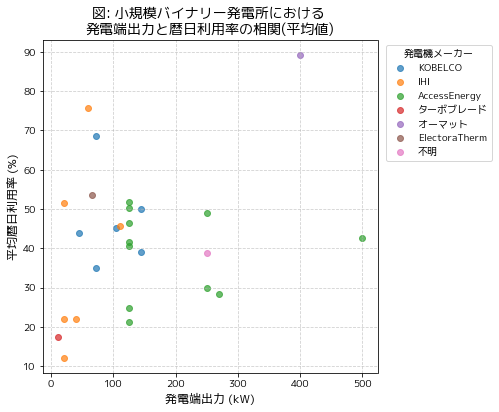

In [12]:
 # Extract the necessary columns, including the generator maker
data_with_maker = data_multiyear[['発電端出力(kW)', 'Average', 'メーカ']].dropna()
data_with_maker.columns = ['Output (kW)', 'Average Rate', 'Maker']

# Plot the relationship categorized by generator maker
plt.figure(figsize=(6, 6), dpi=300)
makers = data_with_maker['Maker'].unique()

for maker in makers:
    maker_data = data_with_maker[data_with_maker['Maker'] == maker]
    plt.scatter(
        maker_data['Output (kW)'], maker_data['Average Rate'], label=maker, alpha=0.7
    )

plt.title('図: 小規模バイナリー発電所における \n発電端出力と暦日利用率の相関(平均値)', fontsize=14)
plt.xlabel('発電端出力 (kW)', fontsize=12)
plt.ylabel('平均暦日利用率 (%)', fontsize=12)
plt.legend(title='発電機メーカー', loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
output_file = get_unique_filename('geothermal_capacity_vs_usage_average.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# プレビュー用のdpiを設定
plt.gcf().set_dpi(72)
# プレビューの表示
plt.show()  

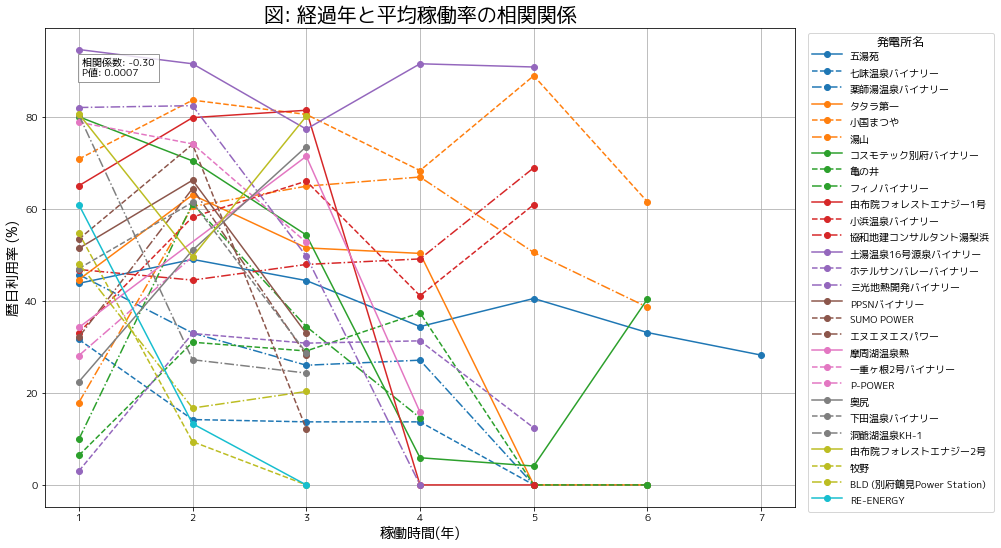

In [13]:
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# データを経過年ごとの形式に変換
data_melted = data_multiyear.melt(
    id_vars=['発電所名', '発電端出力(kW)', 'メーカ'],
    value_vars=['1', '2', '3', '4', '5', '6', '7'],
    var_name='経過年',
    value_name='暦日利用率'
)

# 経過年を数値型に変換
data_melted['経過年'] = pd.to_numeric(data_melted['経過年'])
# 暦日利用率を数値型に変換（エラーが出る値は NaN に変換）
data_melted['暦日利用率'] = pd.to_numeric(data_melted['暦日利用率'], errors='coerce')

# NaN値を含む行を削除
data_melted_dropna = data_melted.dropna(subset=['暦日利用率'])

# 相関係数の計算
correlation, p_value = pearsonr(
    data_melted_dropna['経過年'].astype(float), 
    data_melted_dropna['暦日利用率'].astype(float)
)

# カスタム色と線種を定義
colors = plt.cm.tab10.colors  # 既存のカラーマップから色を選択
linestyles = ['-', '--', '-.']  # 実線、破線、中破線、点線

# 発電所ごとに色と線種を組み合わせる
color_and_linestyle = itertools.cycle(
    [(color, linestyle) for color in colors for linestyle in linestyles]
)

# 折れ線グラフの描画
plt.figure(figsize=(14, 7.9), dpi=300)

for plant in data_melted_dropna['発電所名'].unique():
    plant_data = data_melted_dropna[data_melted_dropna['発電所名'] == plant]
    color, linestyle = next(color_and_linestyle)  # 色と線種を取得
    plt.plot(
        plant_data['経過年'], 
        plant_data['暦日利用率'], 
        marker='o', 
        linestyle=linestyle, 
        color=color, 
        label=plant
    )

# 相関係数をグラフ上に表示
plt.text(
    x=0.05,
    y=0.9,
    s=f'相関係数: {correlation:.2f}\nP値: {p_value:.4f}', 
    fontsize=10,
    transform=plt.gca().transAxes,  
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
)

# グラフの装飾
plt.title('図: 経過年と平均稼働率の相関関係', fontsize=20)
plt.xlabel('稼働時間(年)', fontsize=14)
plt.ylabel('暦日利用率 (%)', fontsize=14)
# 凡例に線幅を指定して区別を明確化
plt.legend(
    title='発電所名',
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    fontsize=10,
    title_fontsize=12,
    handlelength=3,  # 凡例内の線の長さを調整
    handleheight=2,  # 線の高さを調整
    handletextpad=0.8,  # 線とテキストの間隔
    labelspacing=0.1
)
plt.grid(True)
plt.tight_layout() 
output_file = get_unique_filename('working_times_usage_correlation.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# プレビュー用のdpiを設定
plt.gcf().set_dpi(72)
# プレビューの表示
plt.show()  